# 20163228 Yuseon Nam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math

In [2]:
# Make x and y domain matrix
def make_domain_matrix() :
    x_matrix = np.zeros((M, N), dtype="int")
    y_matrix = np.zeros((M, N), dtype="int")
    
    for i in range(M) :
        x_matrix[i, :] = i
    
    for j in range(N) :
        y_matrix[:, j] = j

    return (x_matrix, y_matrix)
    
# Distance function between two vectors x and y by L1 Norm
def distance_L1(x, y, c) :
    dx = abs(x - c[0])
    dy = abs(y - c[1])
    s  = dx + dy
    
    return (s)

# Distance function between two vectors x and y by L2 Norm
def distance_L2(x, y, c):

    dx = (x - c[0]) ** 2
    dy = (y - c[1]) ** 2
    s  = dx + dy
    
    return(s)

# Plot image
def plot_image(label, k) :
    
    plt.imshow(label, cmap=plt.cm.get_cmap('gist_ncar', k))
    plt.colorbar(ticks=range(k), format='color: %d')
    plt.axis('off')

In [3]:
class KMeans() :
    def __init__ (self, k) :
        self.k = k
        self.centroid_xy    = np.zeros((self.k, 2), dtype="double")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
    def plot_image_center(self) :
          
        # Cluster image
        plt.imshow(self.cur_label, cmap=plt.cm.get_cmap('gist_ncar', self.k))
        plt.colorbar(ticks=range(self.k), format='color: %d')
        
        # Previous Centroids as line
        for i in range(self.k) :
            plt.plot(self.centroid_list[i, :, 0], self.centroid_list[i, :, 1], c='b')
                         
        # Current Centroid as point
        for i in range(self.k) :
            plt.scatter(self.centroid_xy[i, 1], self.centroid_xy[i, 0], marker='o', c='r', s=5)
                
        plt.axis('off')
        plt.show()
    
        
    def init_centroid(self) :
        for i in range(M) :
            for j in range(N) :
                rand_label = random.randint(0, self.k-1)
                self.cur_label[i][j] = rand_label
                
                
    def update_centroid(self) :
        self.centroid_xy    = np.zeros((self.k, 2), dtype="double")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
        # Sum all x and y by label
        for i in range (M) :
            for j in range (N) :
                label = self.cur_label[i][j]
                self.centroid_xy[label, 0] += i
                self.centroid_xy[label, 1] += j
                self.centroid_count[label] += 1

        if (self.iter != 0) :
            prev_centroid_list = copy.deepcopy(self.centroid_list)
        self.centroid_list = np.zeros((self.k, self.iter+1, 2), dtype="double")
        
        # Divide sum of centroid by count = Calculate centroid
        for i in range (self.k) :
            if (self.centroid_count[i] != 0) :
                self.centroid_xy[i , :] /= self.centroid_count[i]
            else :
                self.centroid_xy[i, :] = prev_centroid_list[i, self.iter - 1, :]
                
            # Store Centroid
            if (self.iter != 0) :
                for j in range (self.iter) :
                    if ((prev_centroid_list[i, j, 0] != 0.0) and (prev_centroid_list[i, j, 1] != 0.0)) :
                        self.centroid_list[i, j, 0] = prev_centroid_list[i, j, 0]
                        self.centroid_list[i, j, 1] = prev_centroid_list[i, j, 1]
                
            if (self.centroid_count[i] != 0) :
                self.centroid_list[i, self.iter, 0] = self.centroid_xy[i, 1]
                self.centroid_list[i, self.iter, 1] = self.centroid_xy[i, 0]
            else :
                self.centroid_list[i, self.iter, 0] = self.centroid_list[i, self.iter - 1, 0]
                self.centroid_list[i, self.iter, 1] = self.centroid_list[i, self.iter - 1, 1]
                
     
    def labeling(self, norm) :
        # Label for each entry
        for i in range (M) :
            for j in range (N) :
                
                # Calculate distance between each centroid and entry
                dist_sum = []
                for t in range (self.k) :
                    if (norm == 1) :  
                        dist_sum.append(distance_L1(i, j, self.centroid_xy[t, :]))
                    elif (norm == 2) :
                        dist_sum.append(distance_L2(i, j, self.centroid_xy[t, :]))
                        
                # Find minimum distance and its index
                min_dist  = min(dist_sum)
                min_index = dist_sum.index(min_dist)
                
                # Put index in the label
                self.cur_label[i][j] = min_index
                
                
    def train(self, norm) :
        self.cur_label  = np.zeros((M, N), dtype="int")
        self.prev_label = np.zeros((M, N), dtype="int")
        
        self.init_centroid()
        self.iter = 0
        
        while not (np.array_equal(self.cur_label, self.prev_label)) :
            
            self.update_centroid()
            
            print(self.iter)
            self.plot_image_center()
            
            self.prev_label = copy.deepcopy(self.cur_label)
            
            self.labeling(norm)
            
            self.iter += 1
            
        self.iter += 1
        print(self.iter)
        self.plot_image_center()
            
        return (self.cur_label)

In [4]:
# Number of rows(M) and columns(N)
M = 20
N = 20

# Make x and y domain matrix
x_matrix, y_matrix = make_domain_matrix()

## K = 3
### L1 Norm

0


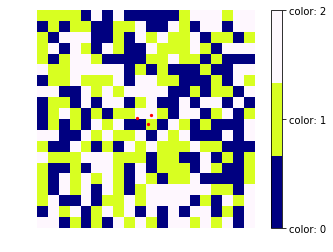

1


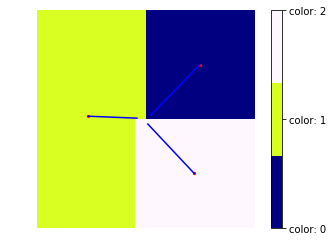

2


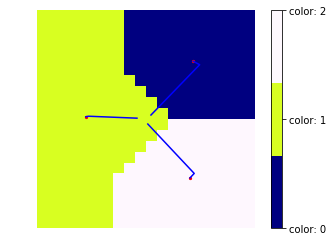

3


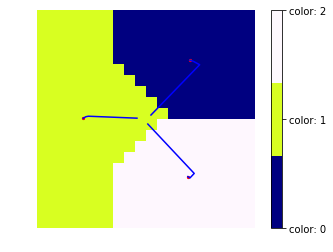

4


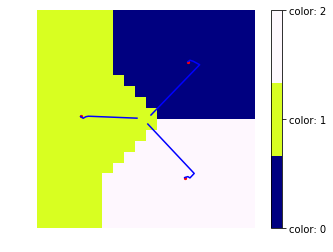

5


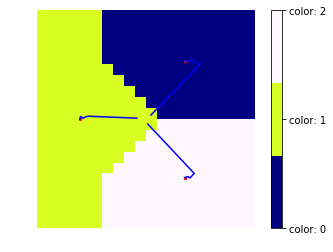

7


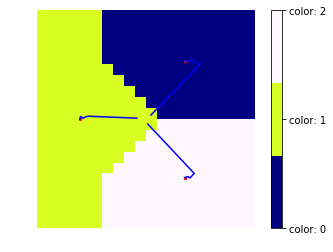

In [5]:
k_num = 3
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

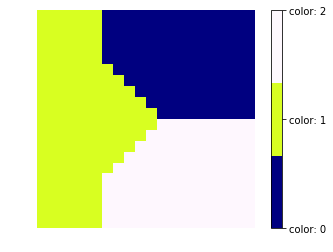

In [6]:
plot_image(k_num_label, k_num)

### L2 Norm

0


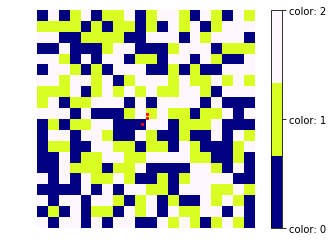

1


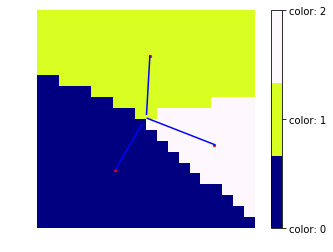

2


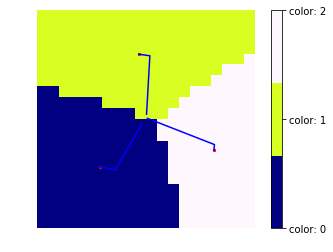

3


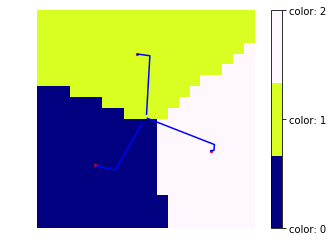

4


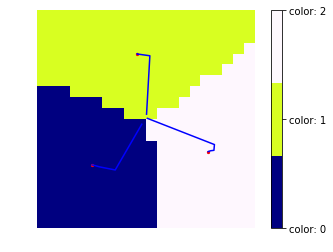

5


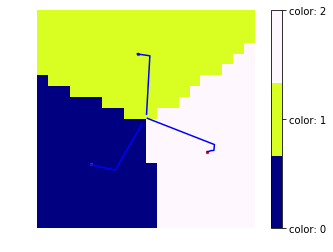

6


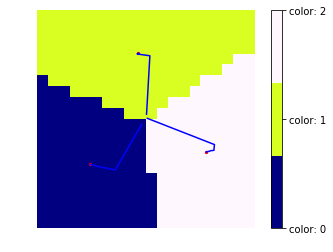

7


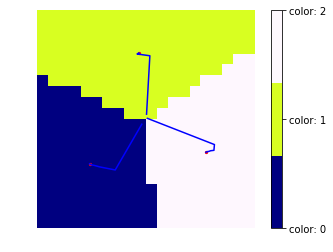

9


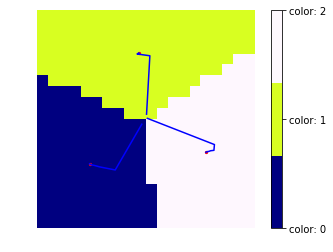

In [7]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

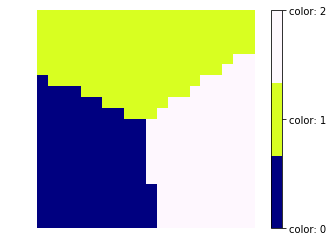

In [8]:
plot_image(k_num_label, k_num)

## K = 8
### L1 Norm

0


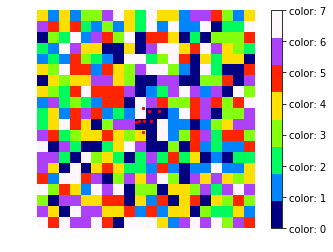

1


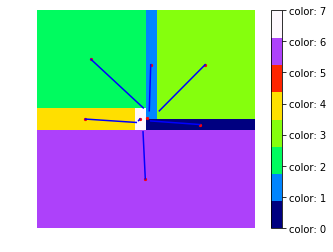

2


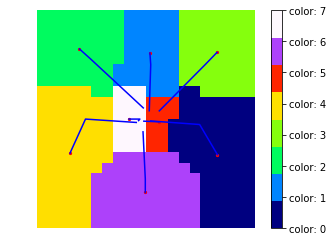

3


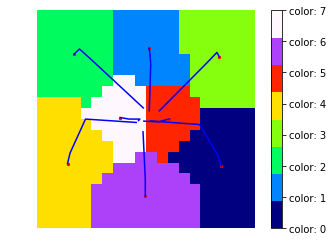

4


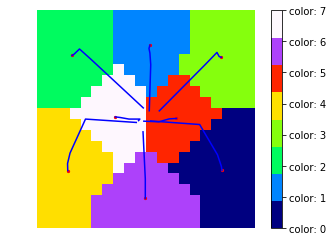

5


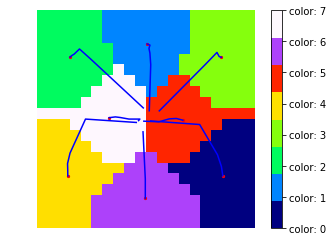

6


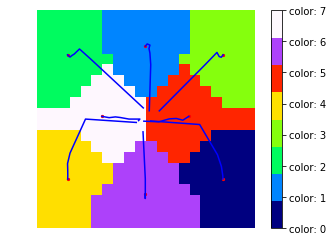

7


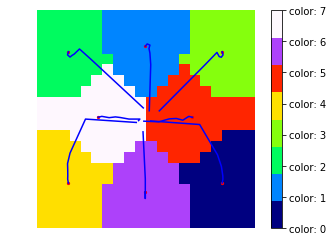

9


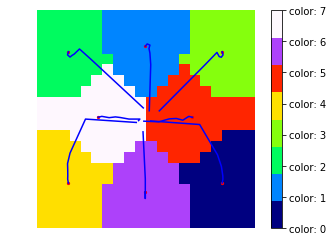

In [9]:
k_num = 8
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

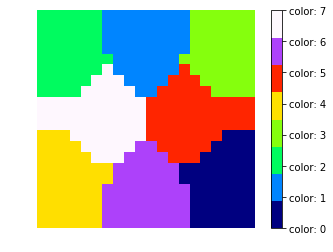

In [10]:
plot_image(k_num_label, k_num)

### L2 Norm

0


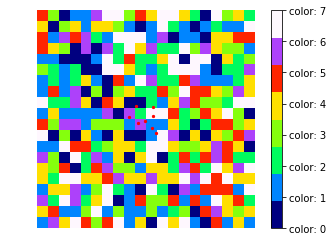

1


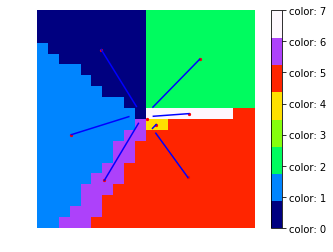

2


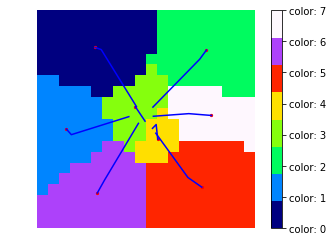

3


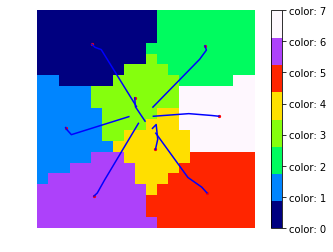

4


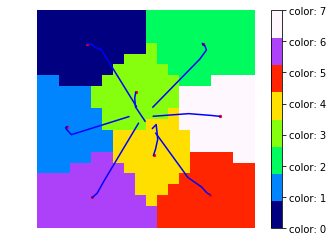

5


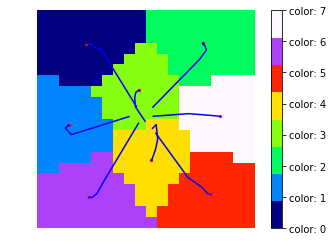

6


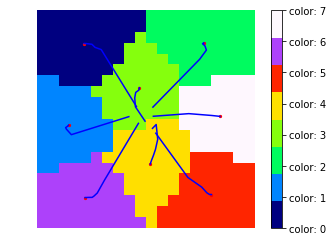

7


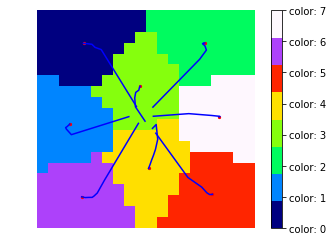

8


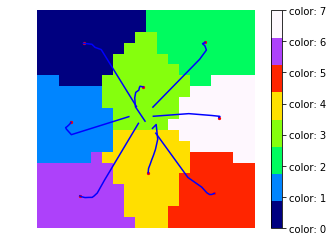

9


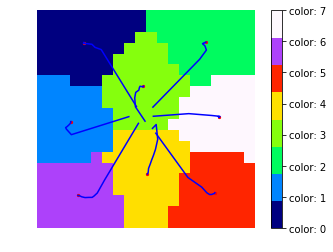

10


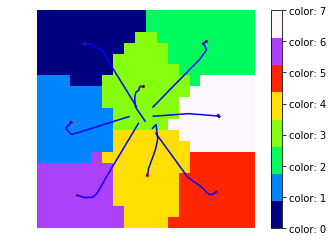

11


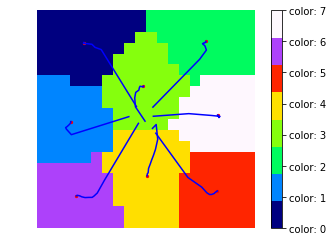

12


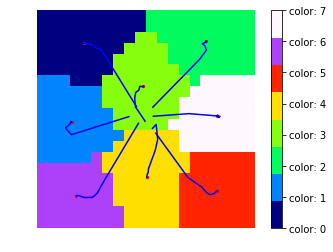

13


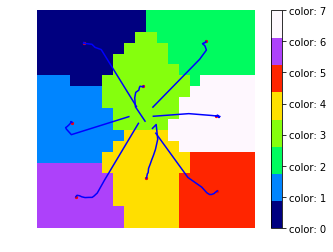

14


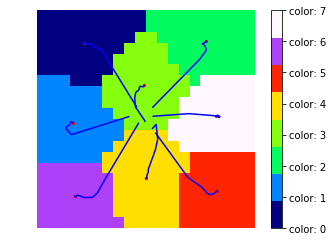

15


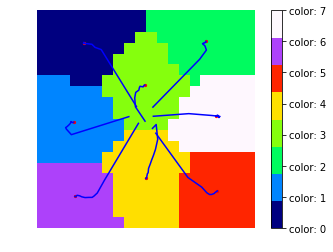

16


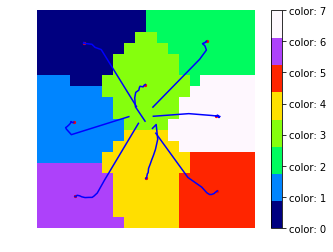

17


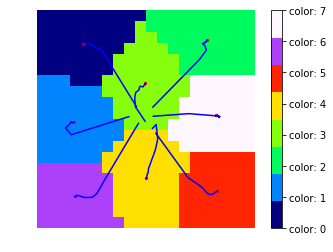

18


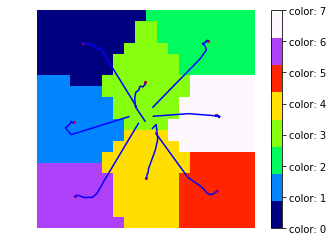

20


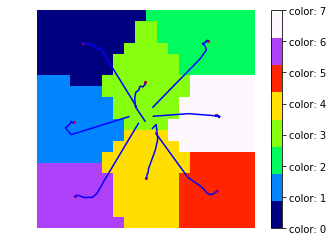

In [11]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

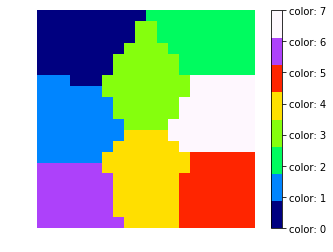

In [12]:
plot_image(k_num_label, k_num)

## K = 16
### L1 Norm

0


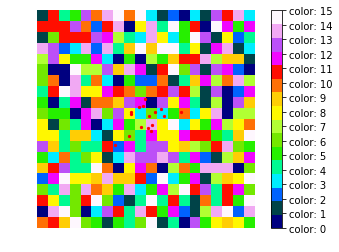

1


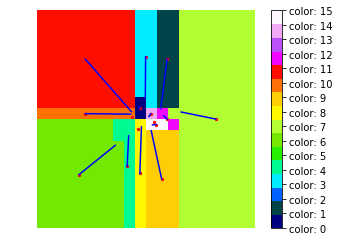

2


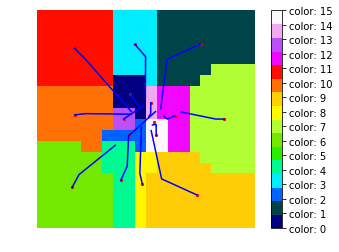

3


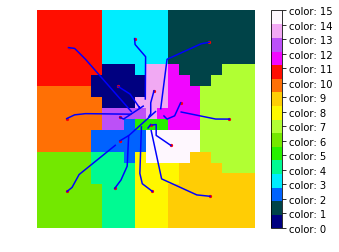

4


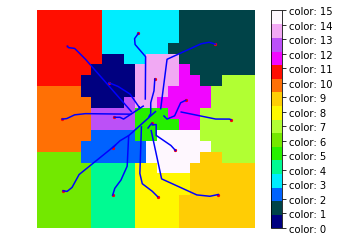

5


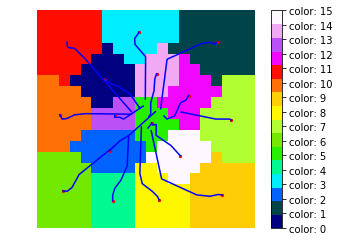

6


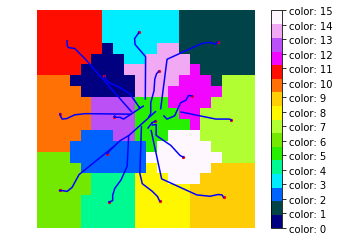

7


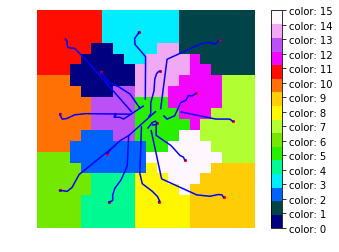

8


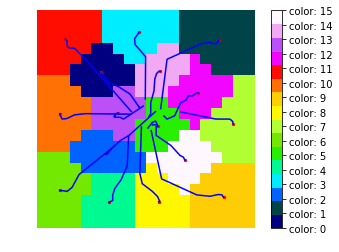

9


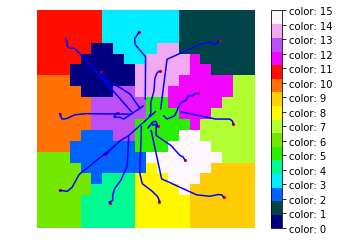

10


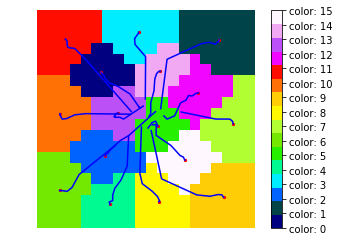

12


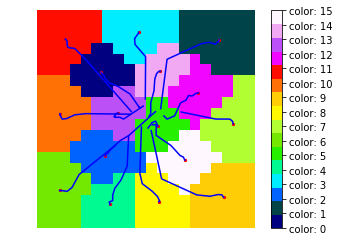

In [13]:
k_num = 16
k_means= KMeans(k_num)
k_num_label = k_means.train(1)

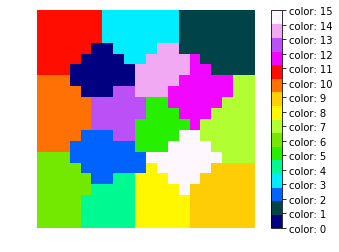

In [14]:
plot_image(k_num_label, k_num)

### L2 Norm

0


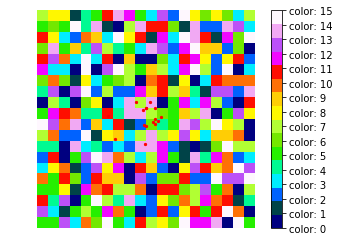

1


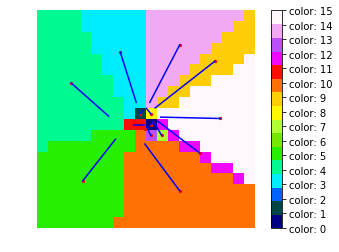

2


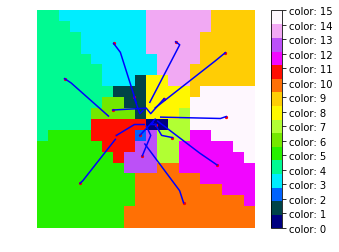

3


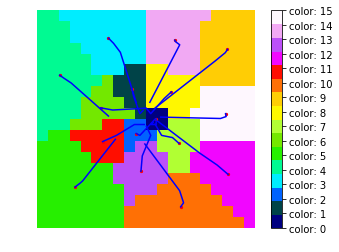

4


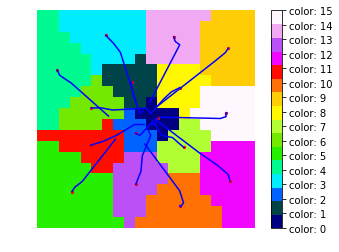

5


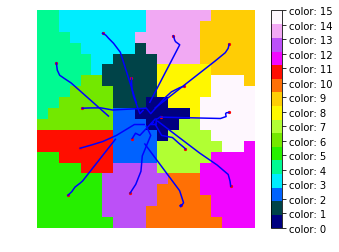

6


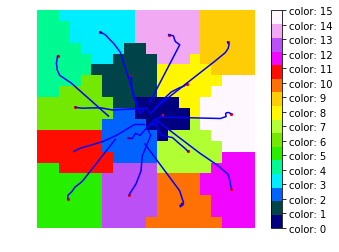

7


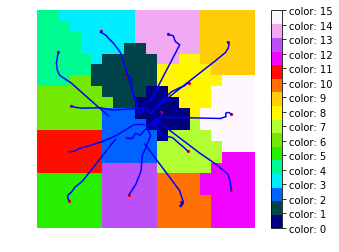

8


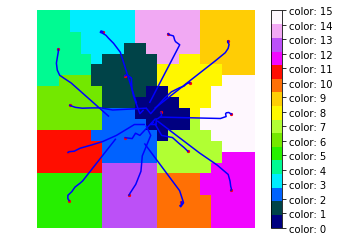

9


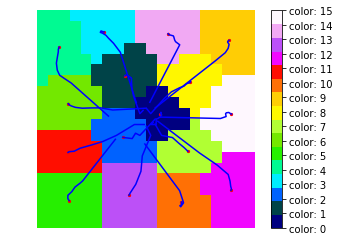

10


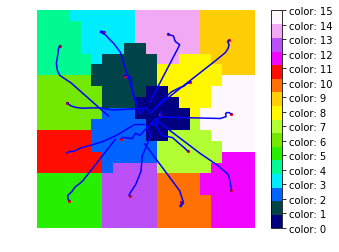

11


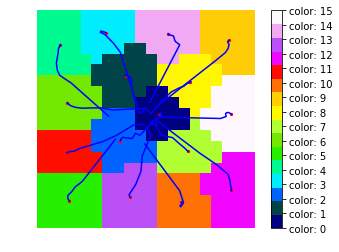

12


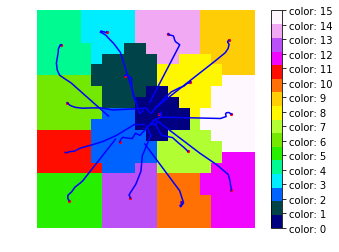

13


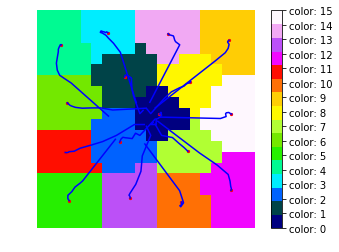

14


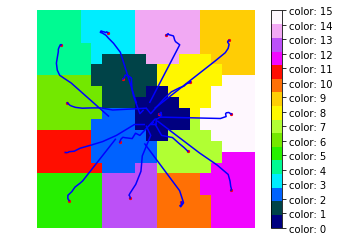

15


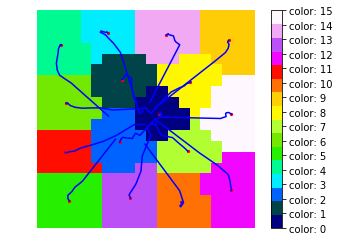

17


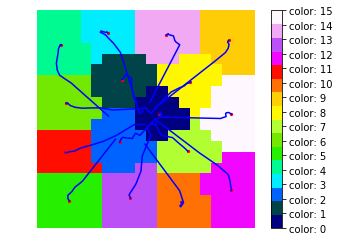

In [15]:
k_means= KMeans(k_num)
k_num_label = k_means.train(2)

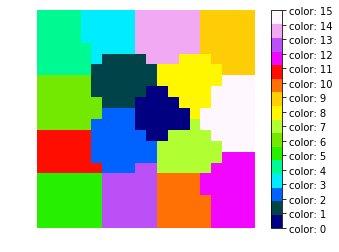

In [16]:
plot_image(k_num_label, k_num)